# Fourier phase spectra of coherent structures 

Me:

I want to understand the Fourier spectrum view of a localized excursion like a Gaussian peak when it appears at different locations in a domain. The power spectrum is unaffected by the location of the peak, but how is the phase spectrum affected when the peak is moved? Is there any way to detect the coherent local nature of the peak from the structure of the Fourier phase spectrum? Any Python code to illustrate this problem would be very helpful to my understanding.

ChatGPT:

Certainly! Understanding the Fourier spectrum view of a localized excursion like a Gaussian peak can be insightful. When you move a peak in the spatial domain, it corresponds to a phase shift in the frequency domain. The magnitude spectrum (power spectrum) remains unchanged, but the phase spectrum is affected.

To illustrate this, you can create a simple Python script using the NumPy library to generate a Gaussian peak, shift it, and analyze its Fourier transform. Here's an example:

# 2D or 1D? Start with 1D 

# 1D version 

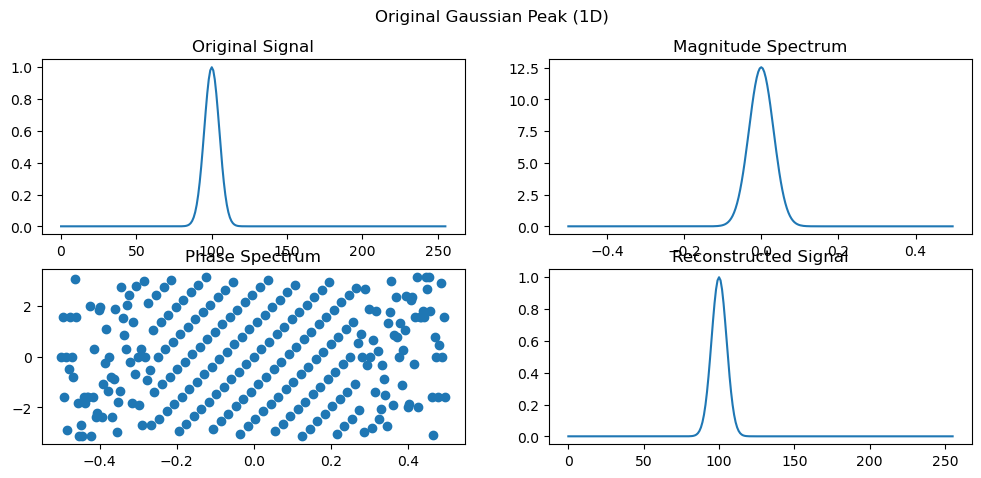

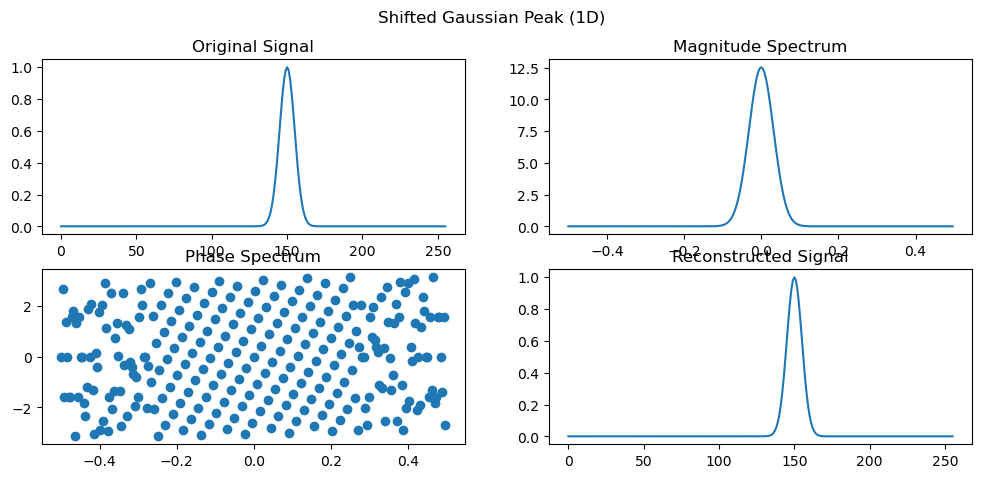

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftshift

def create_gaussian_peak_1d(length, center, sigma):
    x = np.arange(length)
    series = np.exp(-((x - center)**2) / (2 * sigma**2)) 
    return series # - np.mean(series) this creates a notch at zero frequency 

def plot_fft_spectrum_1d(signal, title):
    spectrum = fft(signal)
    # >>> freq = np.fft.fftfreq(n, d=timestep)
    freqs = np.fft.fftfreq(signal.size, 1)
    spectrum_shifted = fftshift(spectrum)
    freqs_shifted = fftshift(freqs) 
    
    magnitude_spectrum = np.abs(spectrum_shifted)
    phase_spectrum = np.angle(spectrum_shifted)

    plt.figure(figsize=(12, 5))

    plt.subplot(221)
    plt.plot(signal)
    plt.title('Original Signal')

    plt.subplot(222)
    plt.plot(freqs_shifted, np.abs(spectrum_shifted))
    plt.title('Magnitude Spectrum')

    plt.subplot(223)
    plt.plot(freqs_shifted, phase_spectrum, marker='o', linestyle='None')
    plt.title('Phase Spectrum')

    shifted_signal = ifft(fftshift(spectrum_shifted))
    plt.subplot(224)
    plt.plot(np.real(shifted_signal))
    plt.title('Reconstructed Signal')

    plt.suptitle(title)
    plt.show()

    return freqs_shifted, magnitude_spectrum, phase_spectrum

# Parameters
signal_length = 256
peak_center1 = 100
peak_center2 = 150

sigma = 5

# Create Gaussian peak at the original location
original_peak_1d = create_gaussian_peak_1d(signal_length, peak_center1, sigma)
plot_fft_spectrum_1d(original_peak_1d, 'Original Gaussian Peak (1D)')

# Create Gaussian peak at a different location
shifted_peak_1d = create_gaussian_peak_1d(signal_length, peak_center2, sigma)
plot_fft_spectrum_1d(shifted_peak_1d, 'Shifted Gaussian Peak (1D)');


# Loop over locations of a peak, collecting the phase spectra 

location 0.0


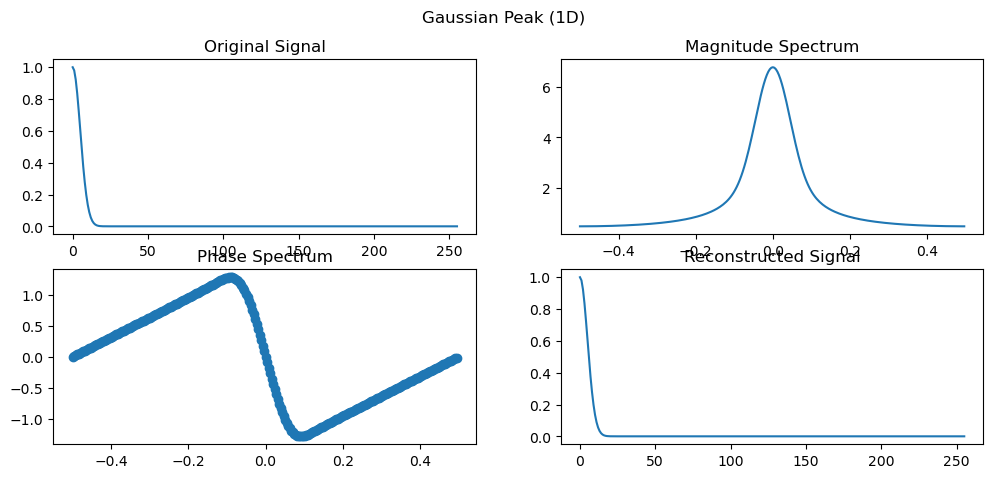

location 11.590909090909092


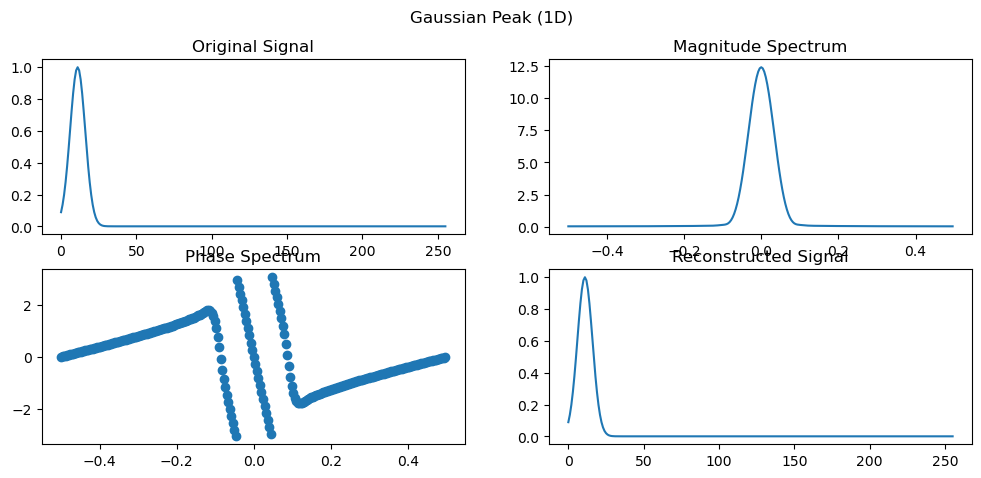

location 23.181818181818183


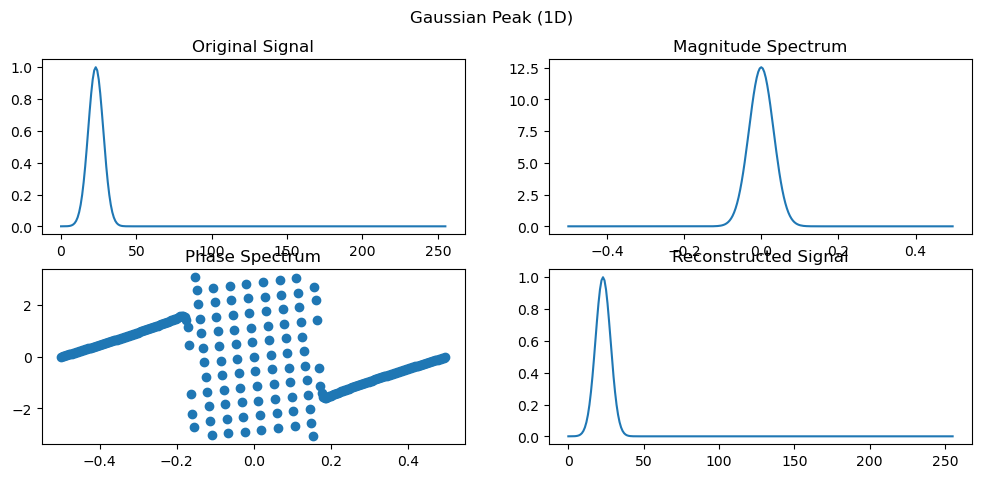

location 34.77272727272727


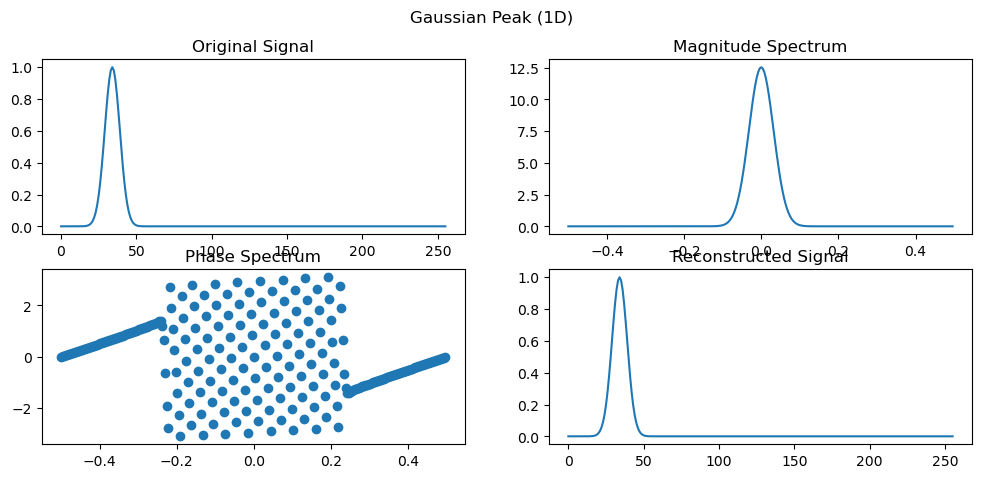

location 46.36363636363637


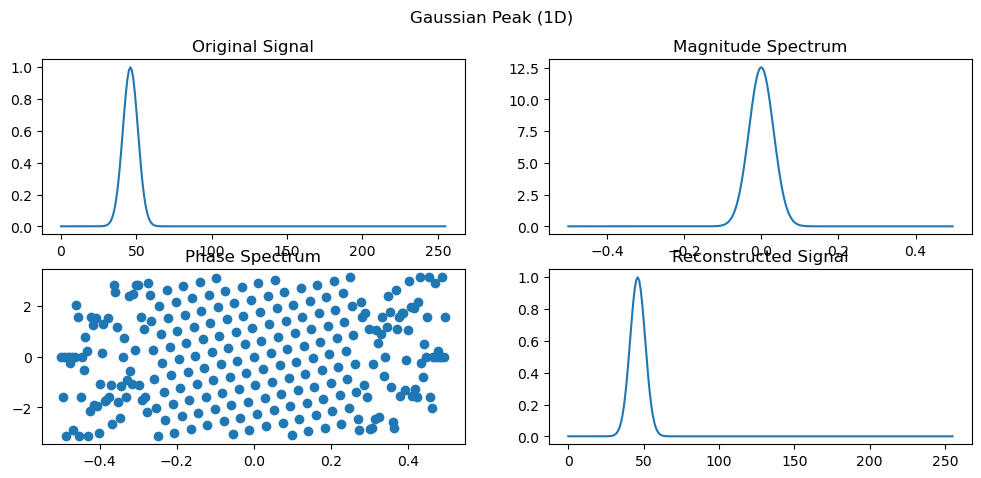

location 57.95454545454546


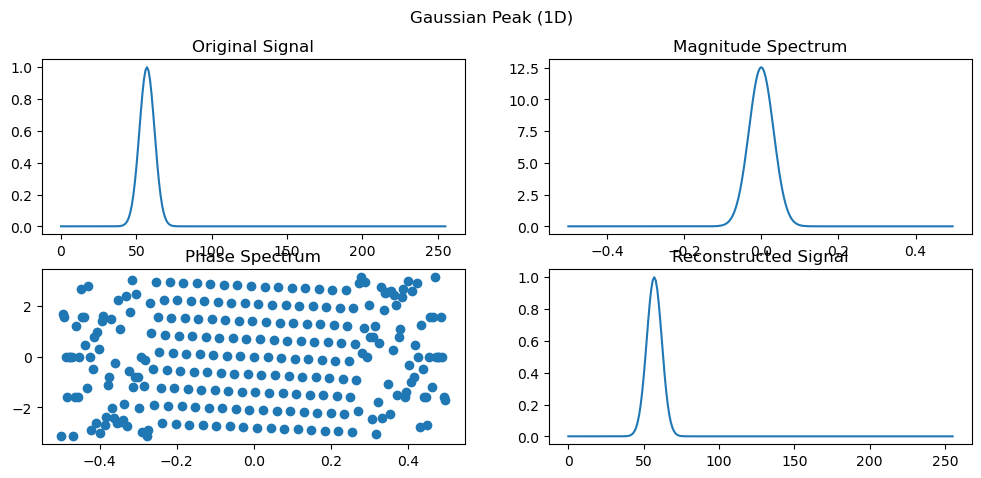

location 69.54545454545455


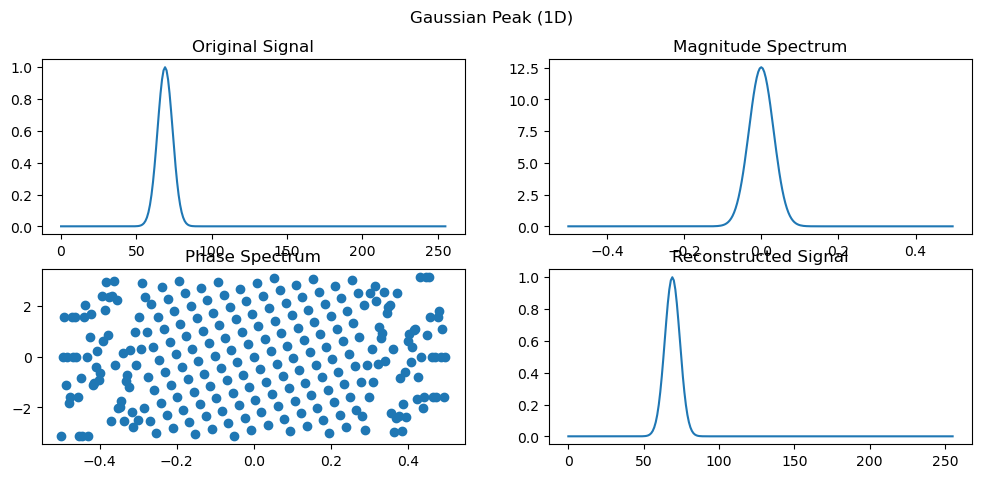

location 81.13636363636364


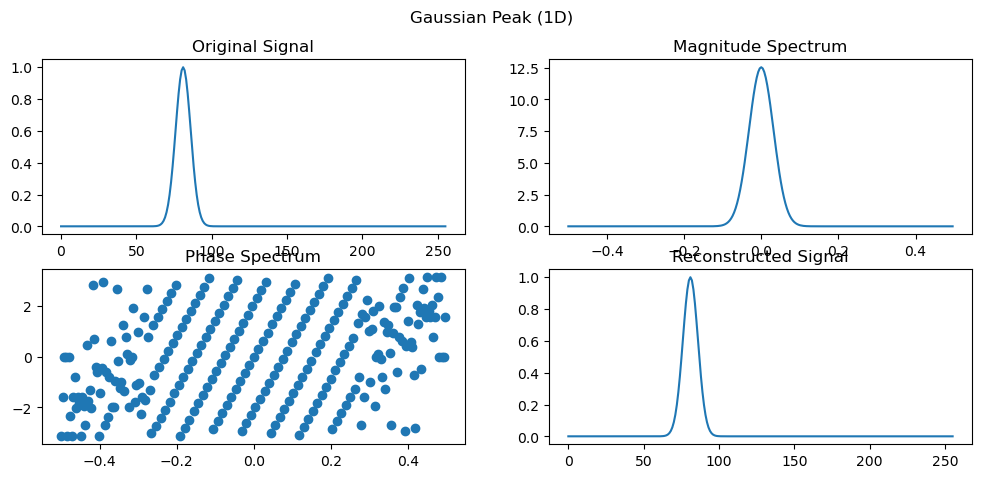

location 92.72727272727273


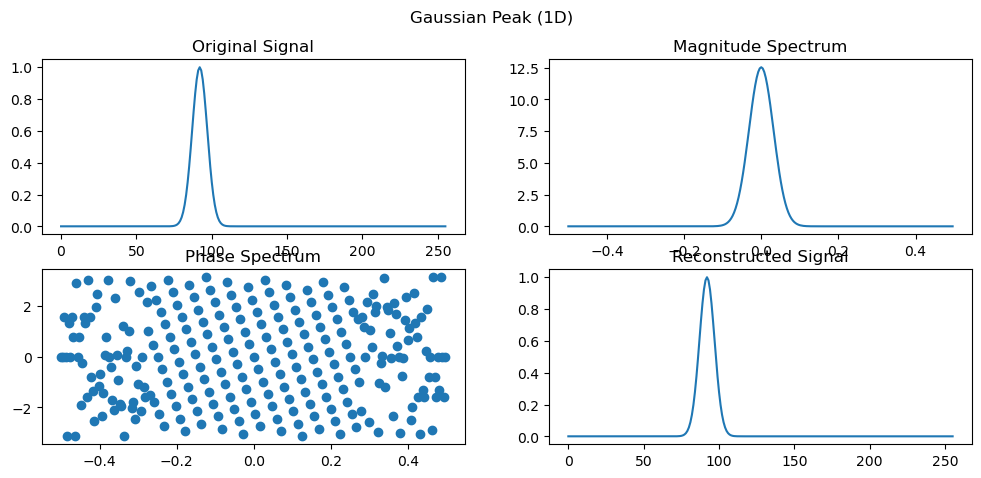

location 104.31818181818183


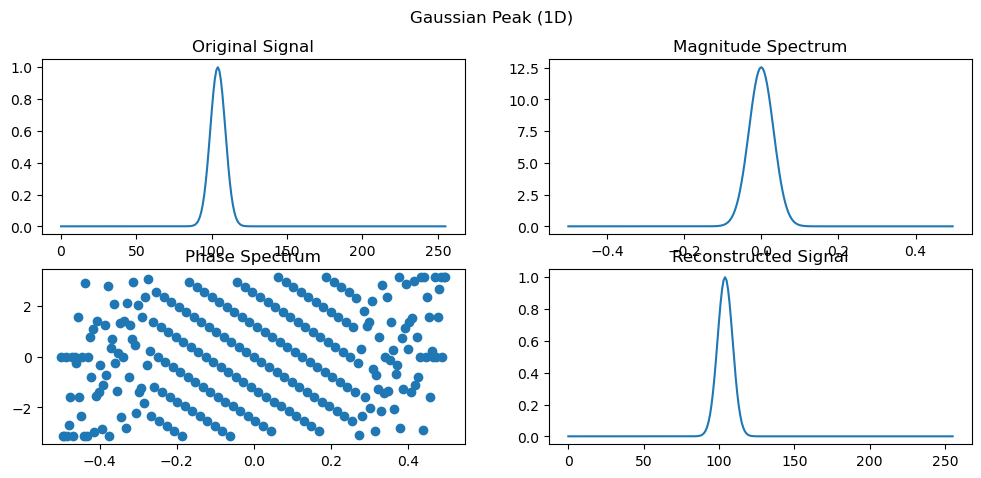

location 115.90909090909092


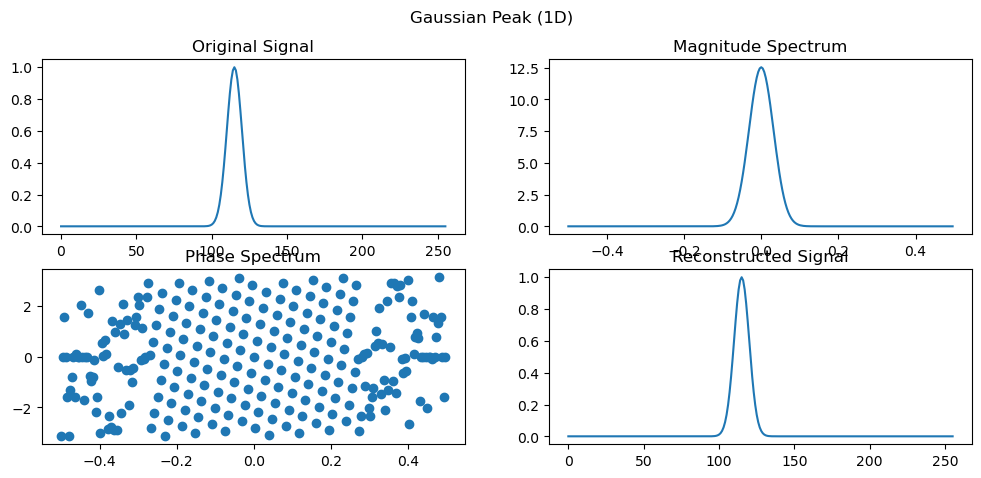

location 127.50000000000001


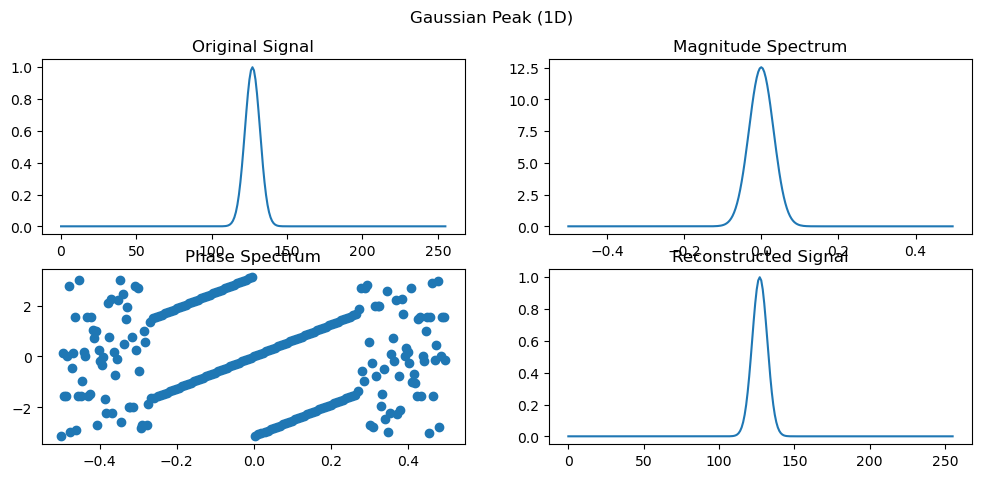

location 139.0909090909091


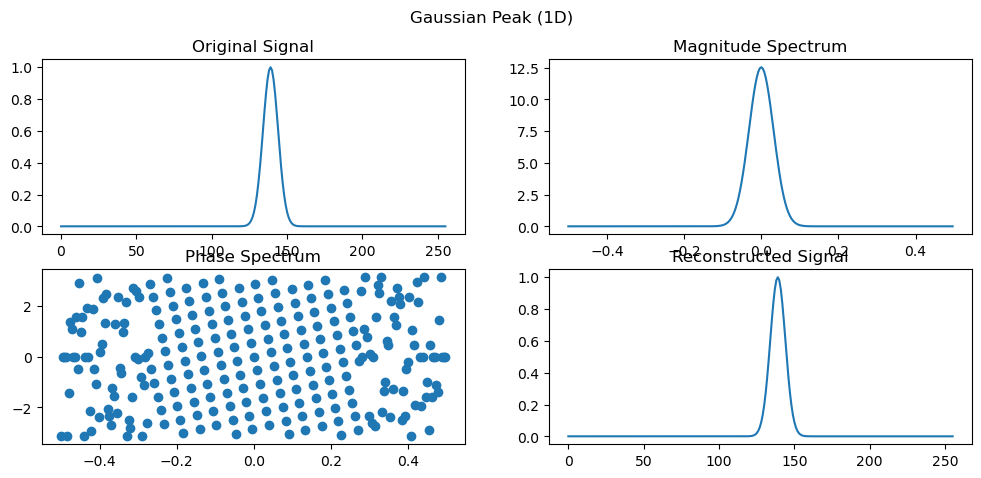

location 150.6818181818182


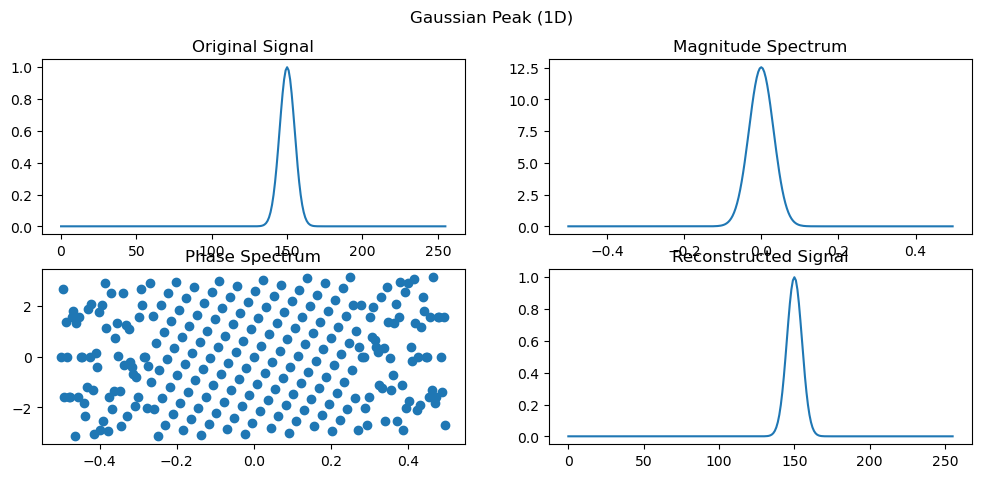

location 162.27272727272728


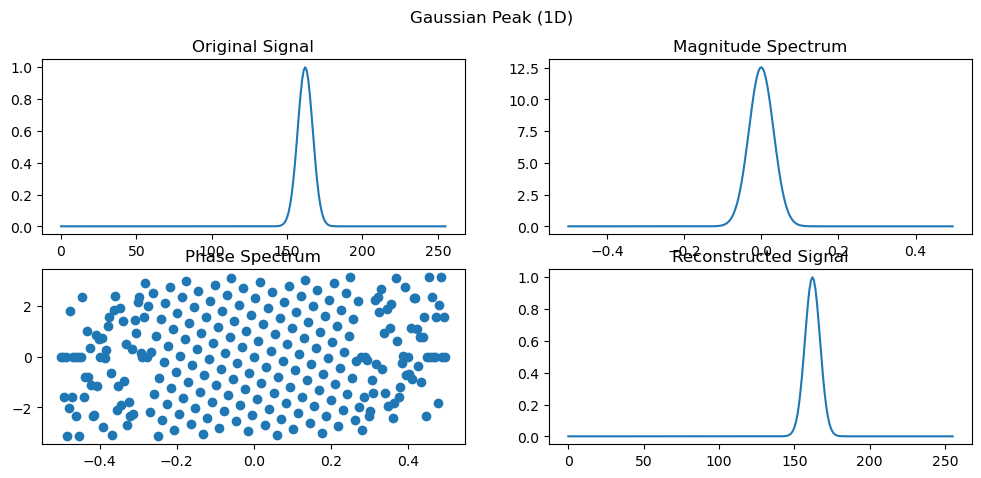

location 173.86363636363637


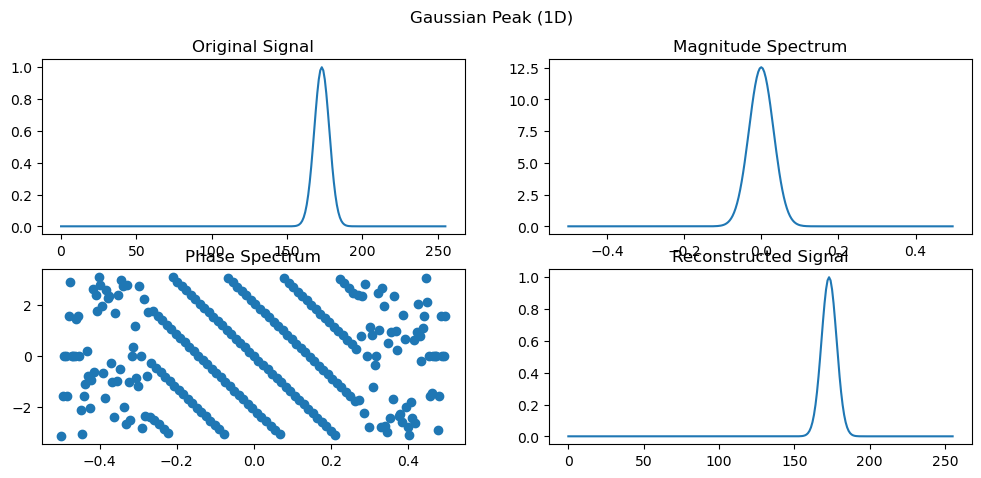

location 185.45454545454547


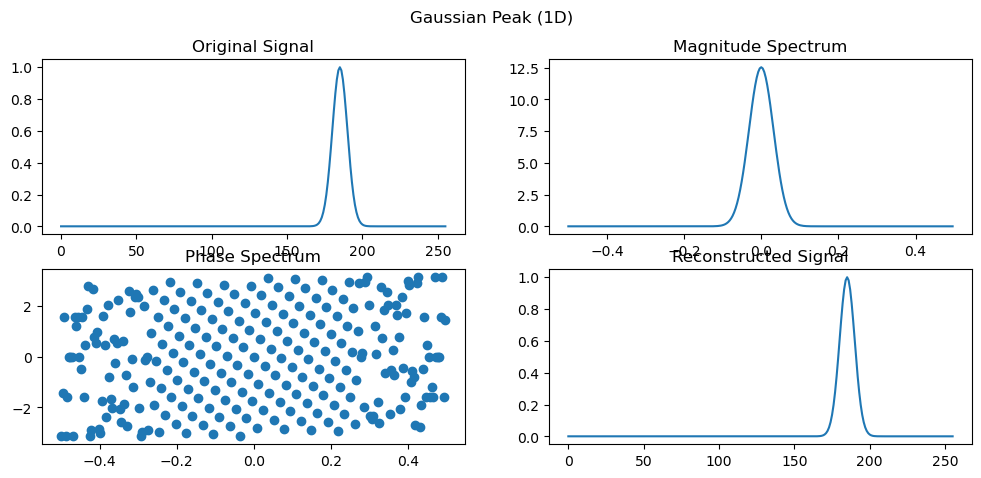

location 197.04545454545456


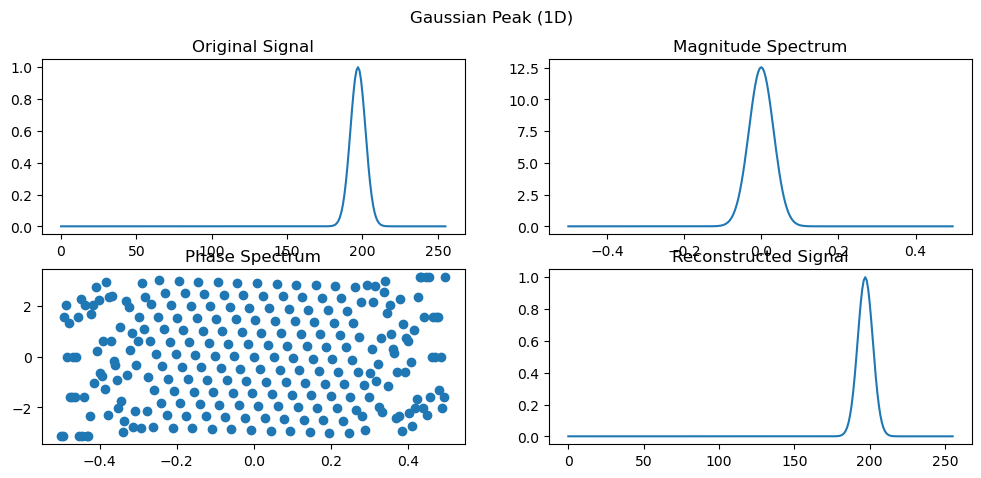

location 208.63636363636365


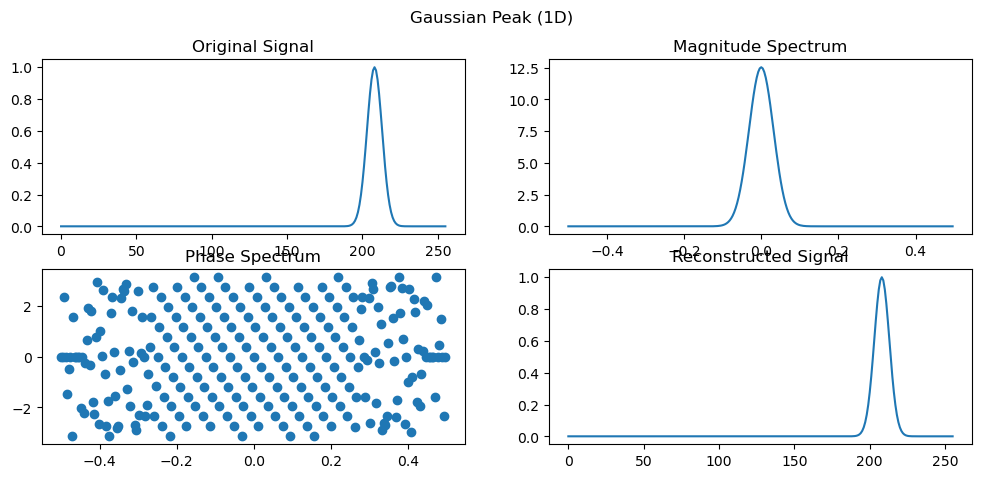

location 220.22727272727275


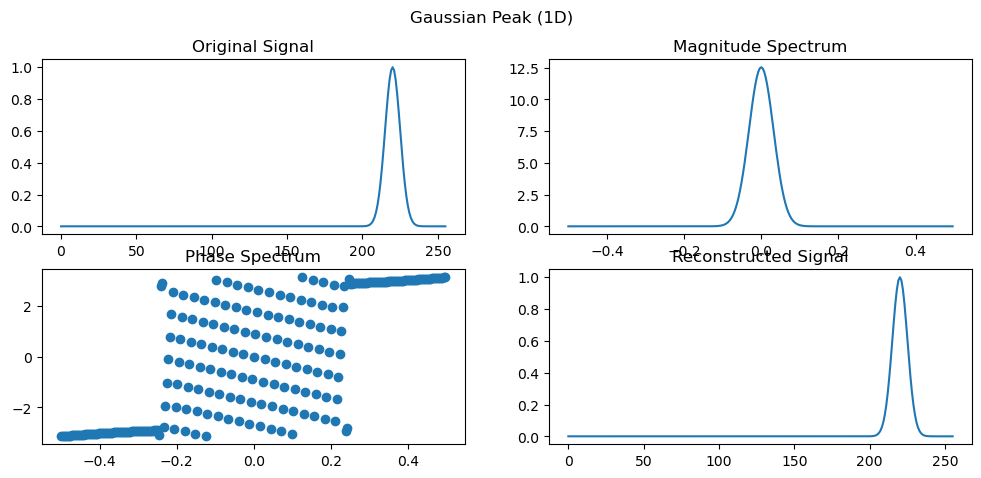

location 231.81818181818184


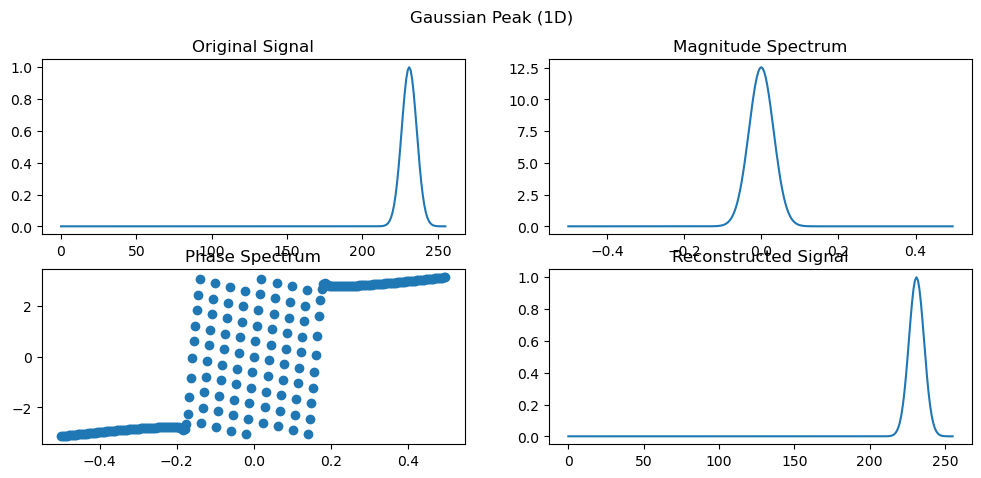

location 243.40909090909093


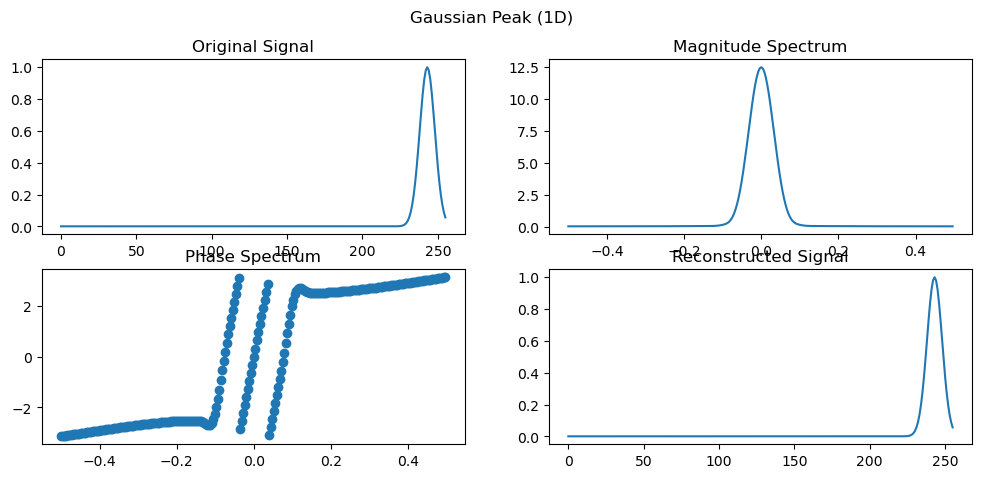

location 255.0


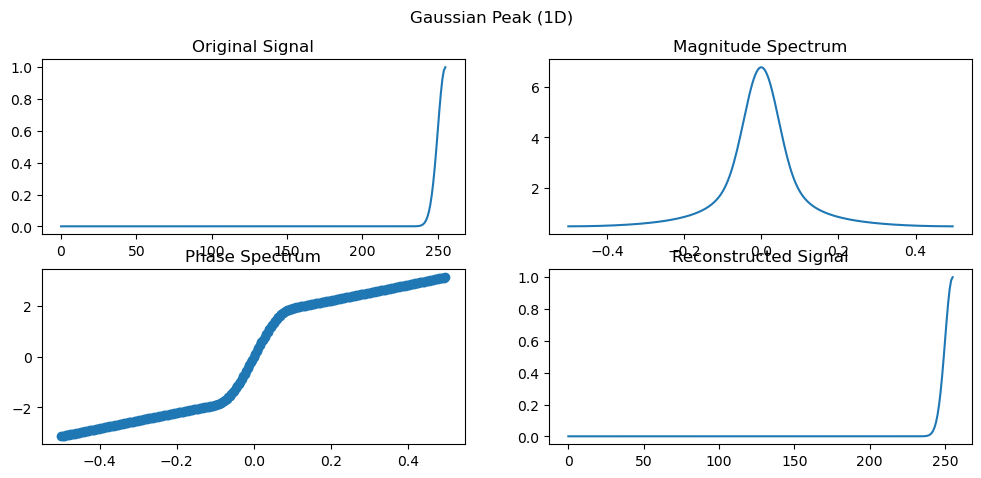

In [76]:
# Parameters
signal_length = 256
peak_center1 = 100
peak_center2 = 150
sigma = 5

locs = []
pspecs = []
aspecs = []

for iloc in np.linspace(0,255,23): 
    loc = int(iloc)
    peak_1d = create_gaussian_peak_1d(signal_length, loc, sigma)
    print('location', iloc) 

    freq,aspec,pspec = plot_fft_spectrum_1d(peak_1d, 'Gaussian Peak (1D)')

    locs.append(loc) 
    pspecs.append(pspec)
    aspecs.append(aspec) 

Text(0.5, 1.0, 'Phase spectra of one localized peak at locations from 0-255')

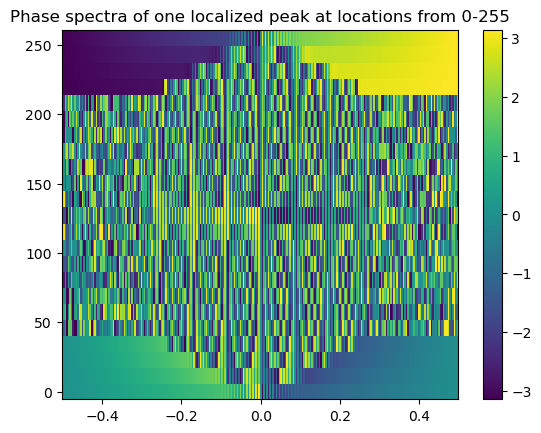

In [83]:
pspecs = np.array(pspecs)
aspecs = np.array(aspecs)
locs = np.array(locs)
pspecs.shape

plt.pcolormesh(freq,locs,pspecs); plt.colorbar()
plt.title('Phase spectra of one localized peak at locations from 0-255')

Text(0.5, 1.0, 'Amplitude spectra of one localized peak at locations from 0-255')

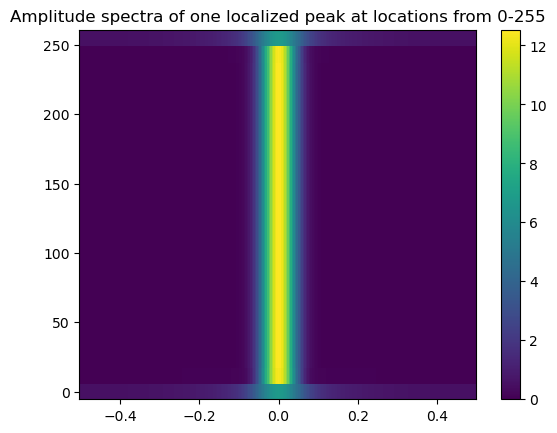

In [81]:
plt.pcolormesh(freq,locs,aspecs); plt.colorbar()
plt.title('Amplitude spectra of one localized peak at locations from 0-255')

# Two peaks, one always in the center 

location 0.0


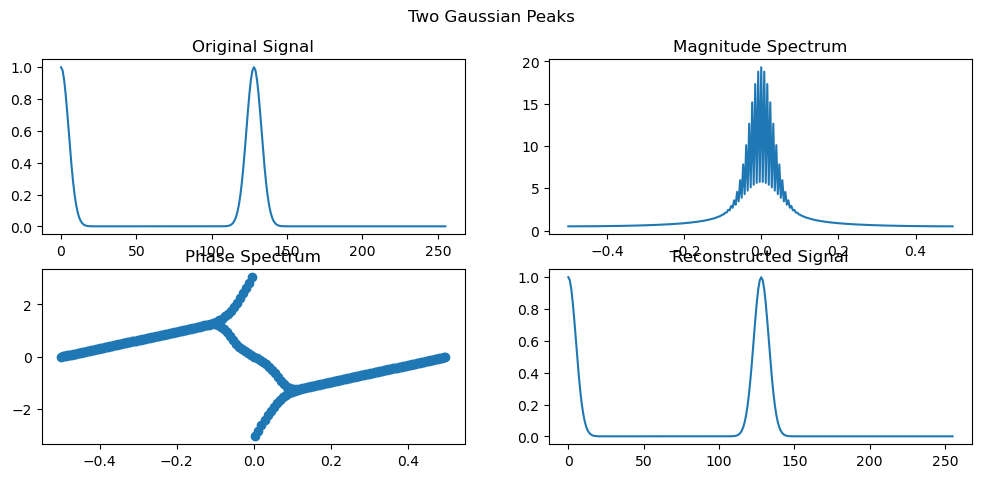

location 11.590909090909092


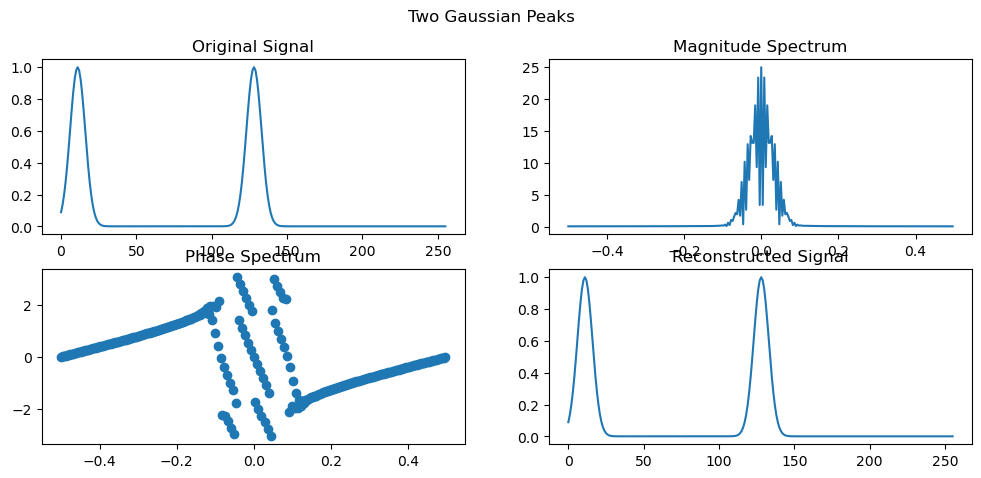

location 23.181818181818183


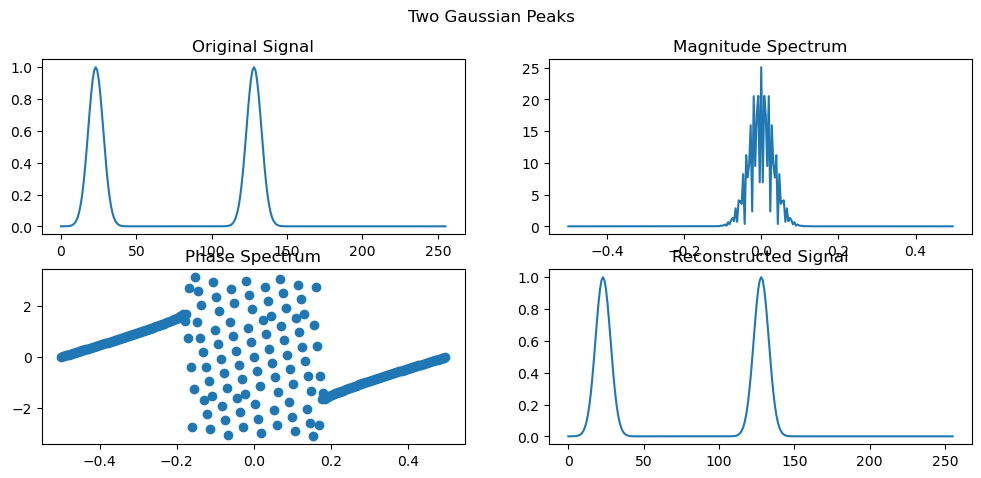

location 34.77272727272727


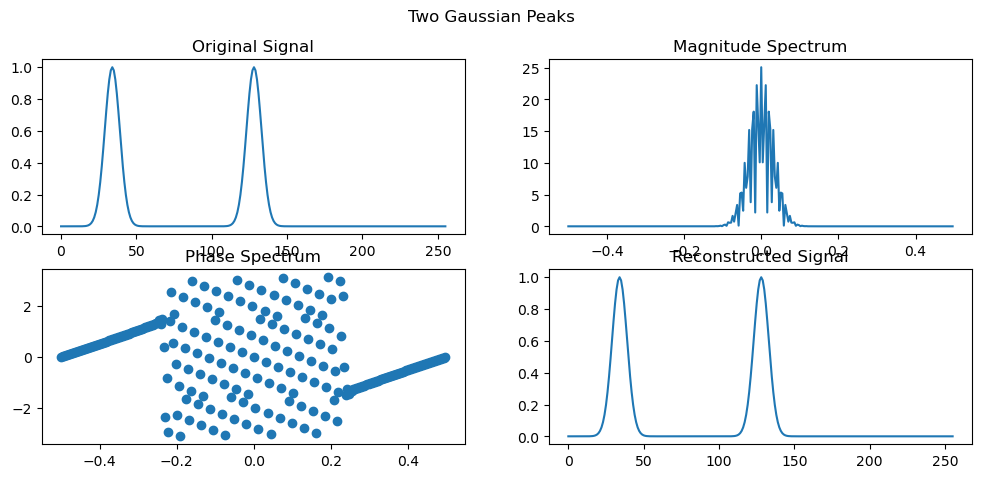

location 46.36363636363637


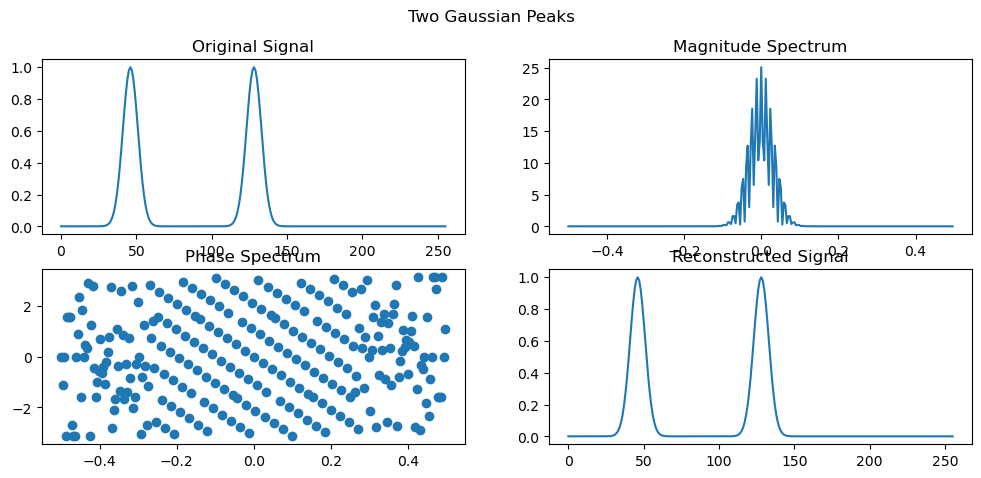

location 57.95454545454546


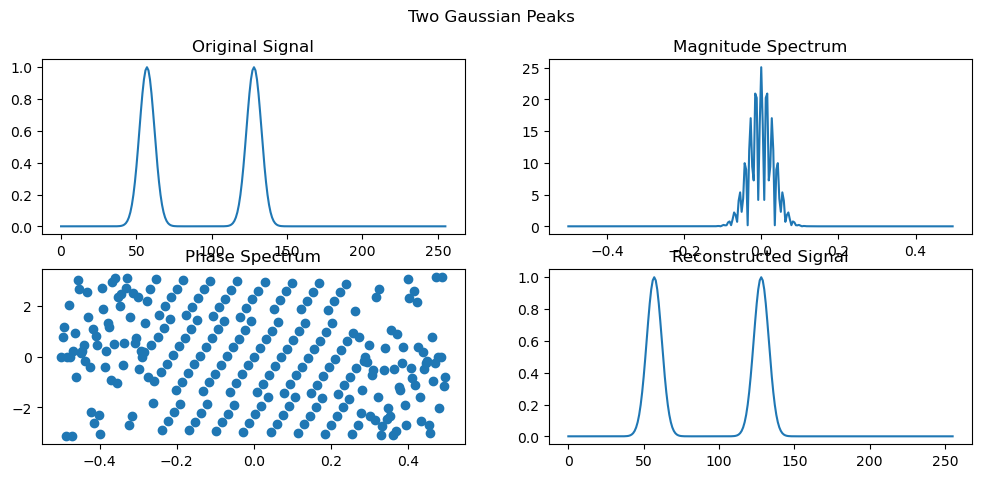

location 69.54545454545455


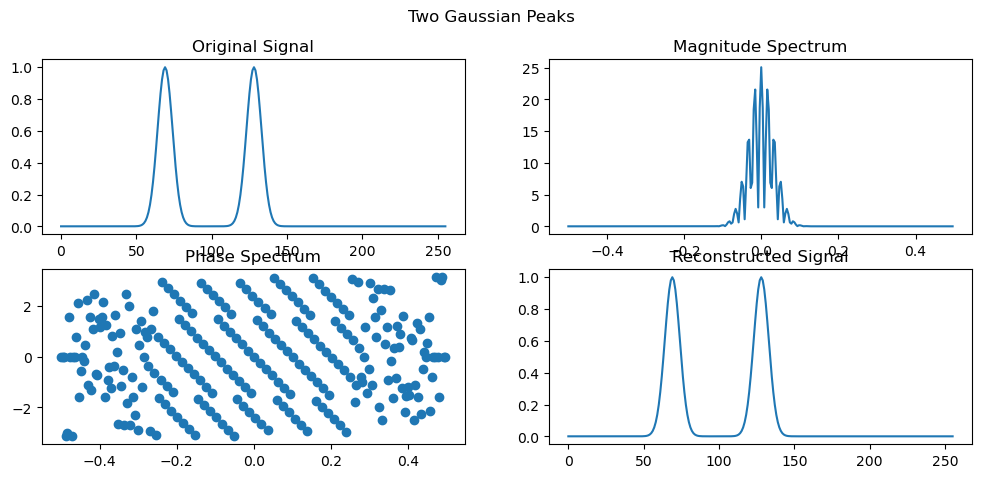

location 81.13636363636364


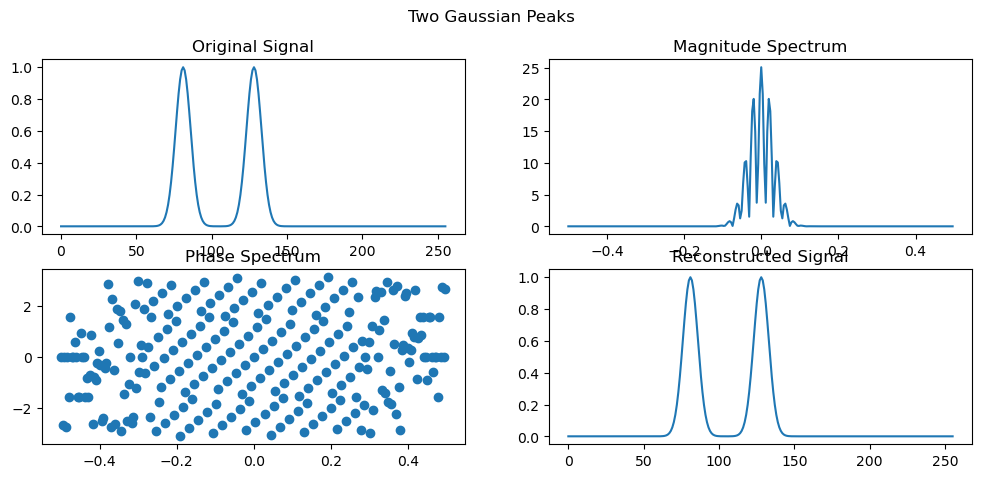

location 92.72727272727273


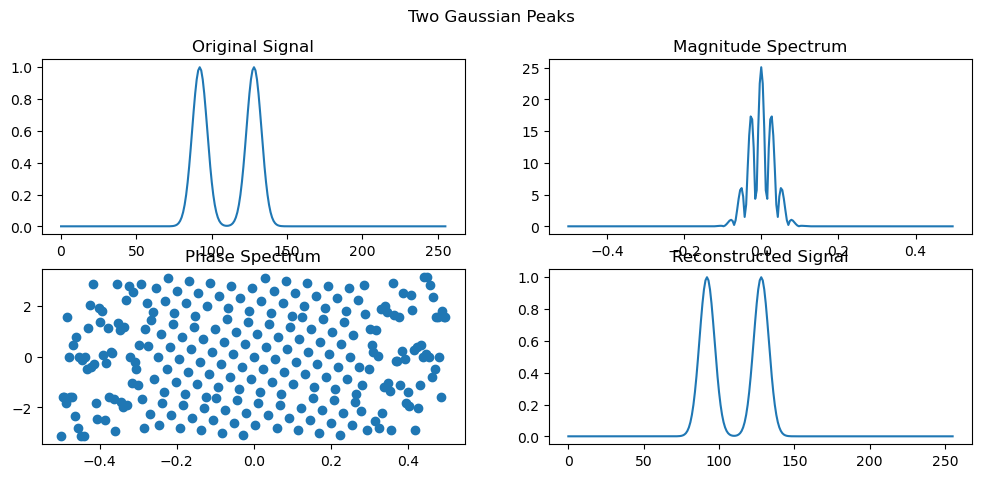

location 104.31818181818183


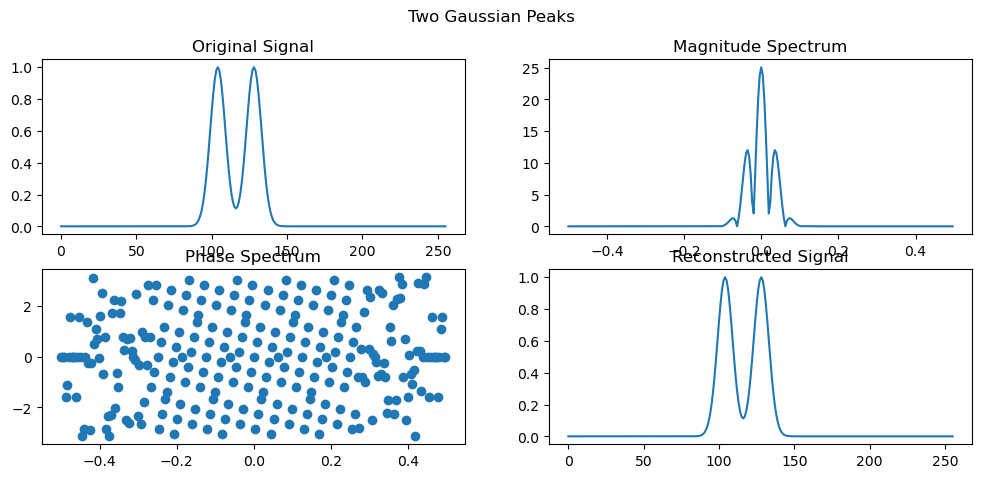

location 115.90909090909092


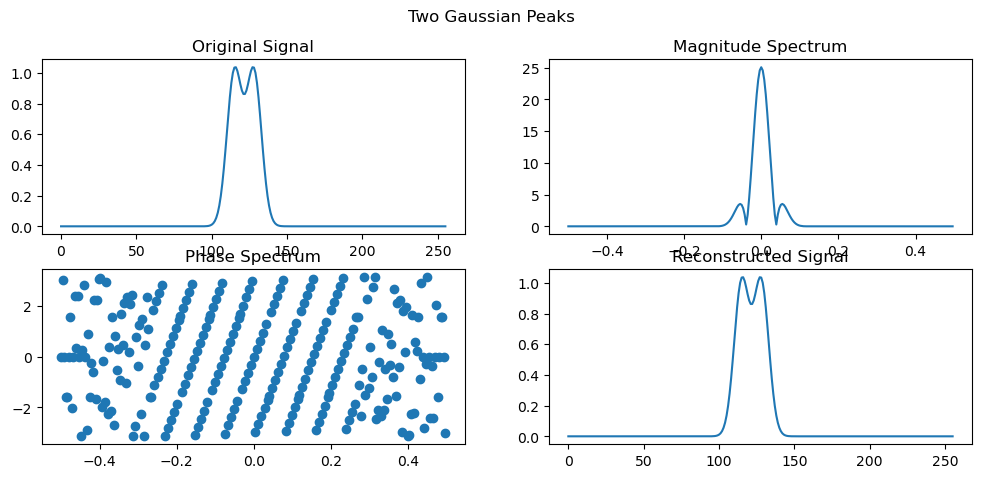

location 127.50000000000001


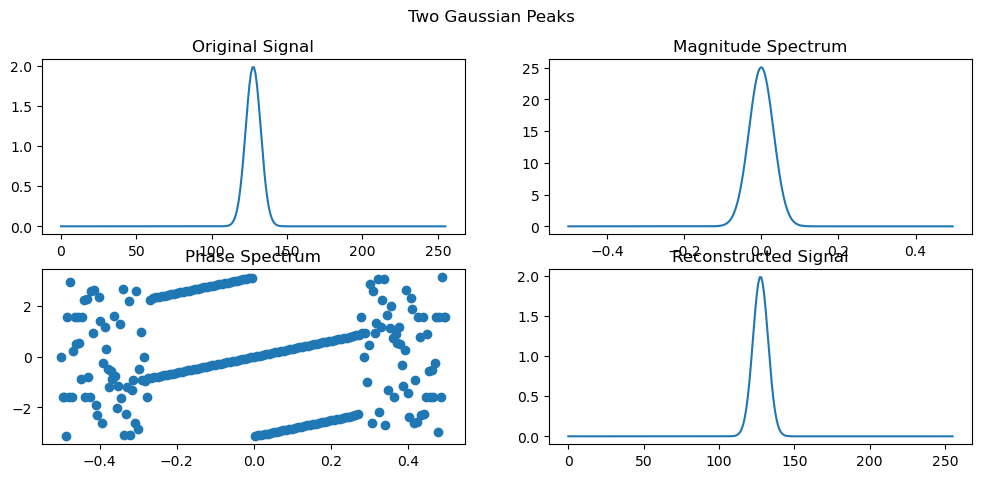

location 139.0909090909091


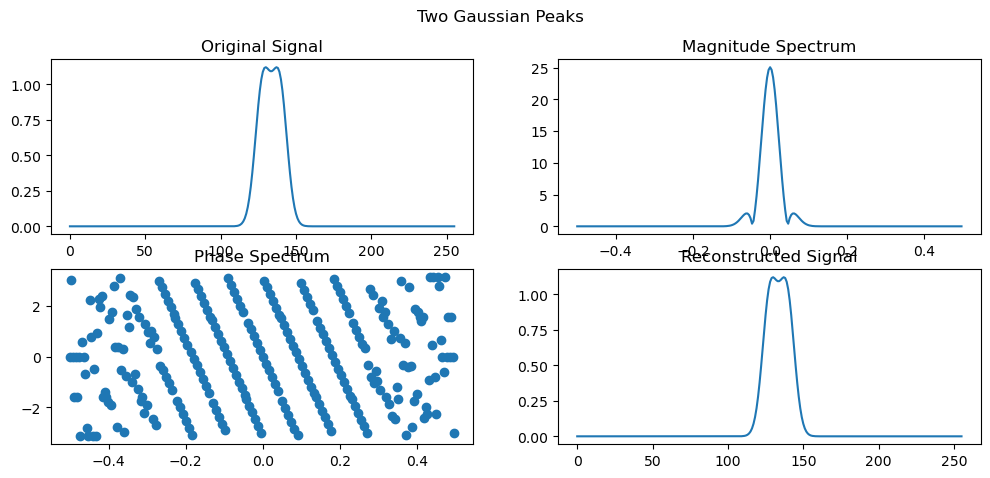

location 150.6818181818182


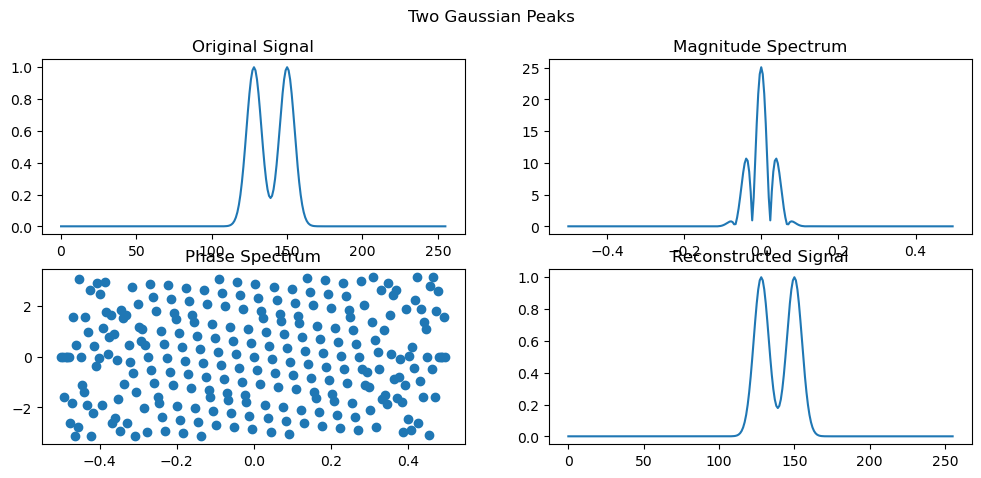

location 162.27272727272728


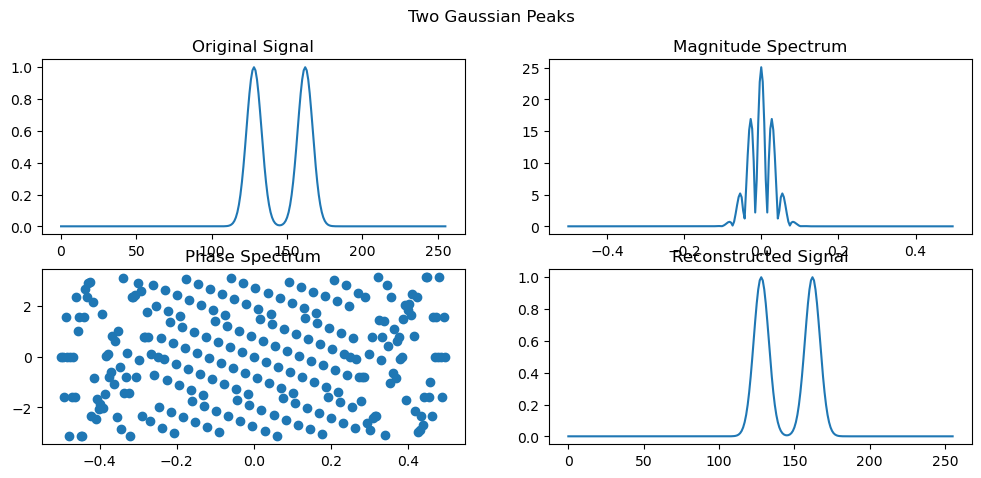

location 173.86363636363637


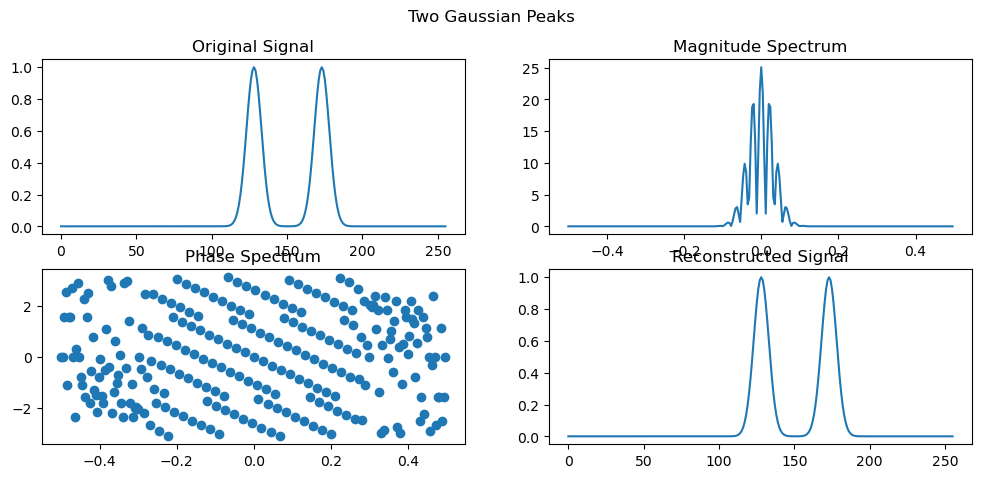

location 185.45454545454547


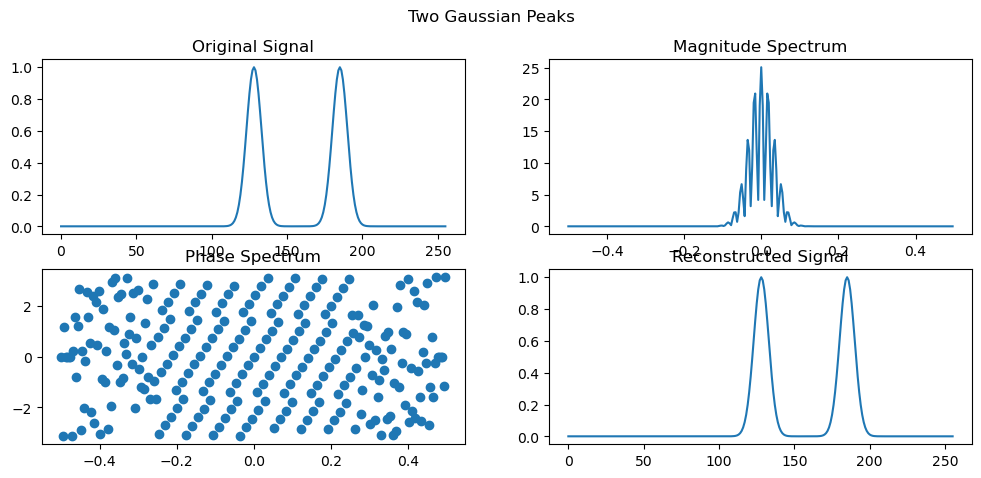

location 197.04545454545456


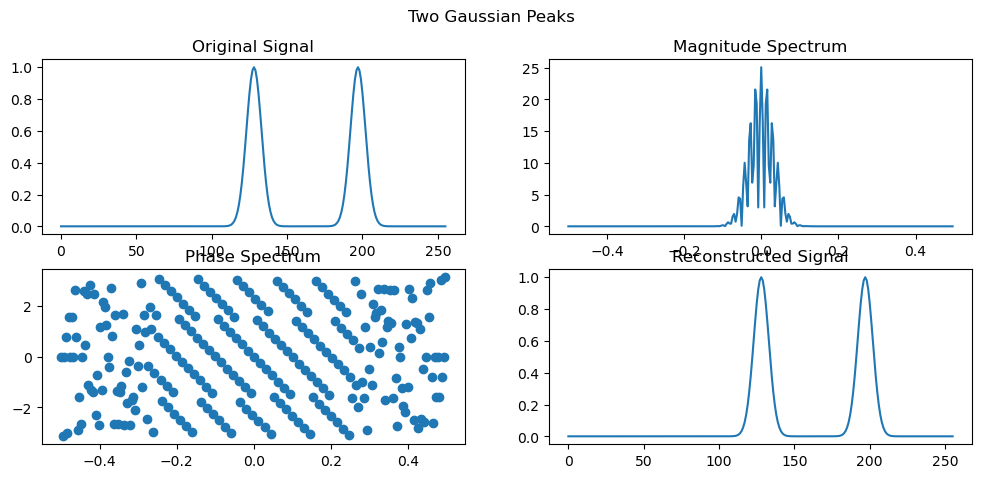

location 208.63636363636365


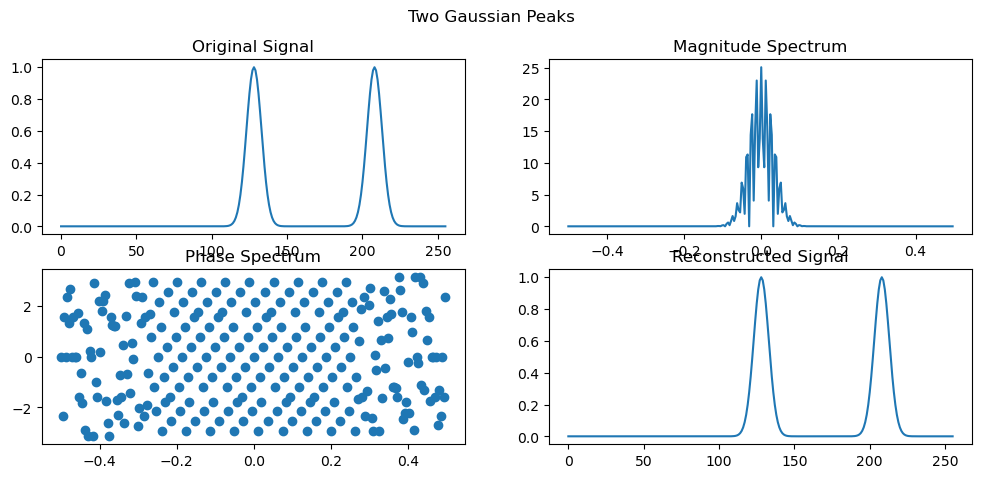

location 220.22727272727275


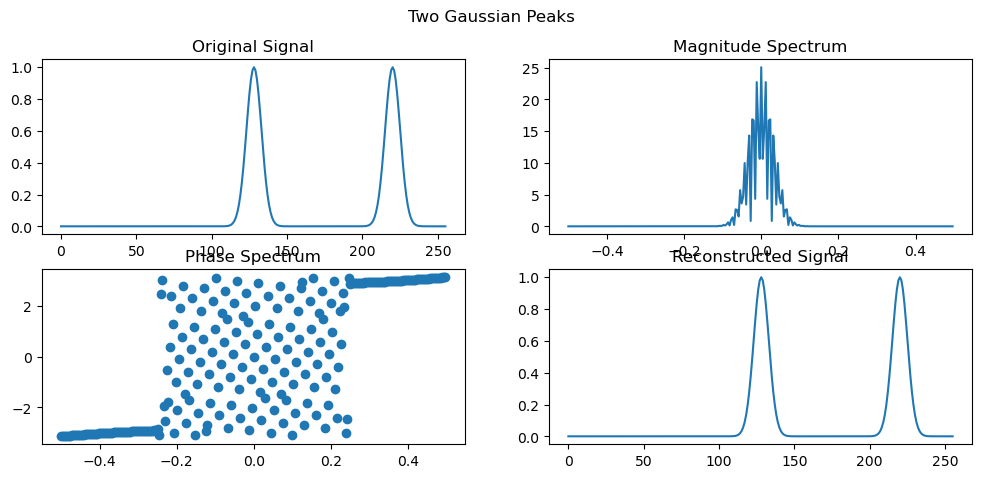

location 231.81818181818184


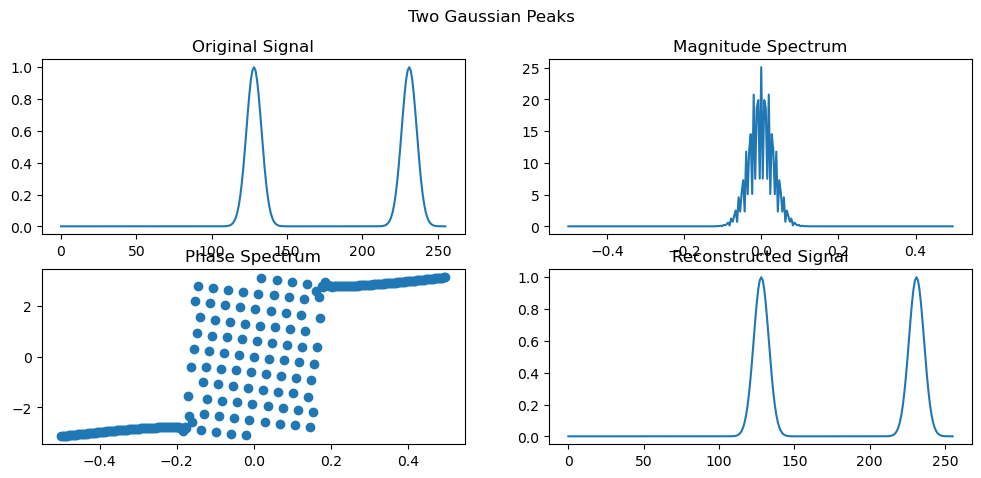

location 243.40909090909093


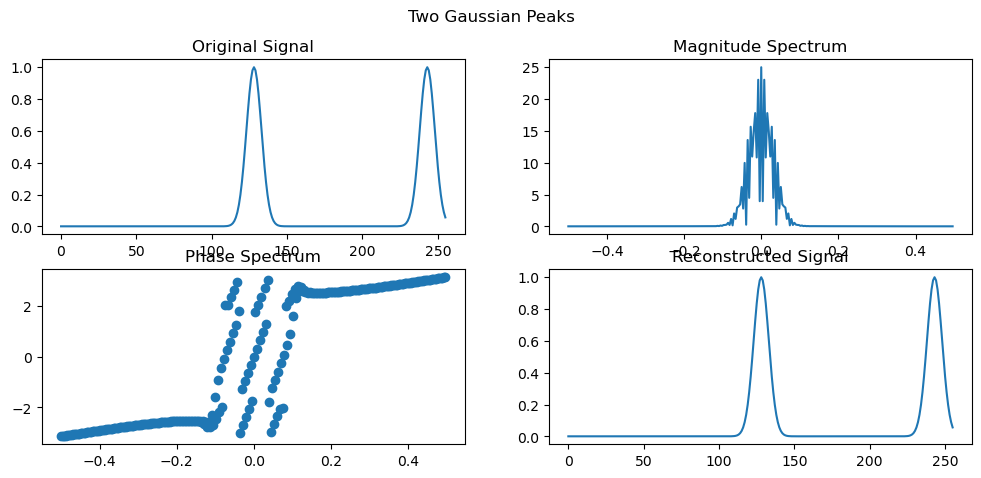

location 255.0


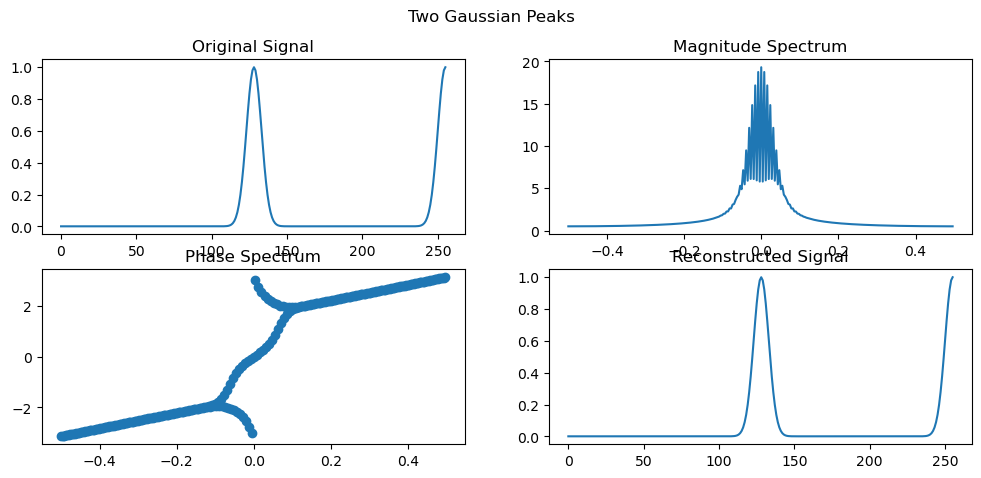

In [82]:
locs = []
pspecs = []
aspecs = []

for iloc in np.linspace(0,255,23): 
    loc = int(iloc)
    peak_1d = create_gaussian_peak_1d(signal_length, loc, sigma)
    print('location', iloc) 

    peak_1d_center = create_gaussian_peak_1d(signal_length, 128, sigma)

    freq,aspec,pspec = plot_fft_spectrum_1d(peak_1d+peak_1d_center, 'Two Gaussian Peaks')

    locs.append(loc) 
    pspecs.append(pspec)
    aspecs.append(aspec) 

Text(0.5, 1.0, 'Phase spectra of a second localized peak at locations from 0-255')

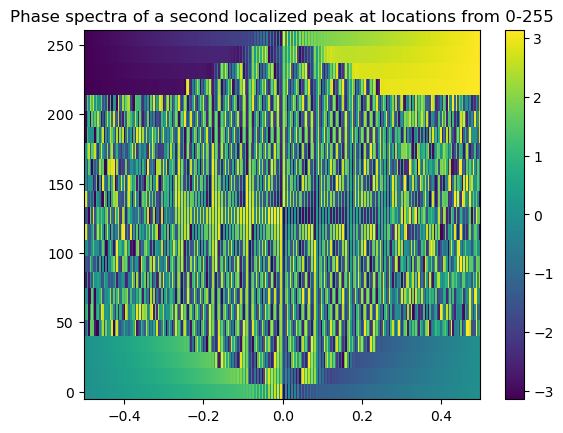

In [87]:
pspecs = np.array(pspecs)
aspecs = np.array(aspecs)
locs = np.array(locs)
pspecs.shape

plt.pcolormesh(freq,locs,pspecs); plt.colorbar()
plt.title('Phase spectra of a second localized peak at locations from 0-255')

Text(0.5, 1.0, 'Amplitude spectra of a second localized peak at locations from 0-255')

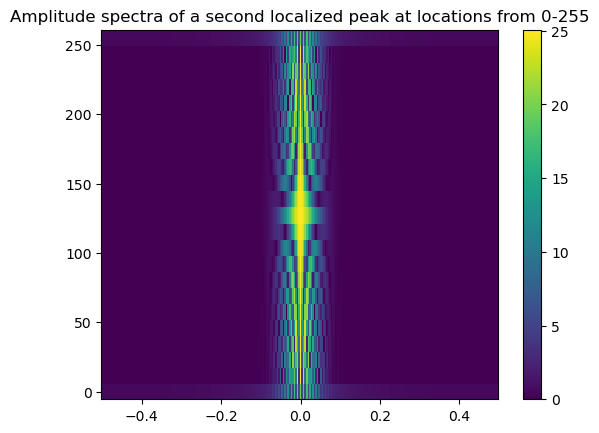

In [86]:
plt.pcolormesh(freq,locs,aspecs); plt.colorbar()
plt.title('Amplitude spectra of a second localized peak at locations from 0-255')

# 2D images 

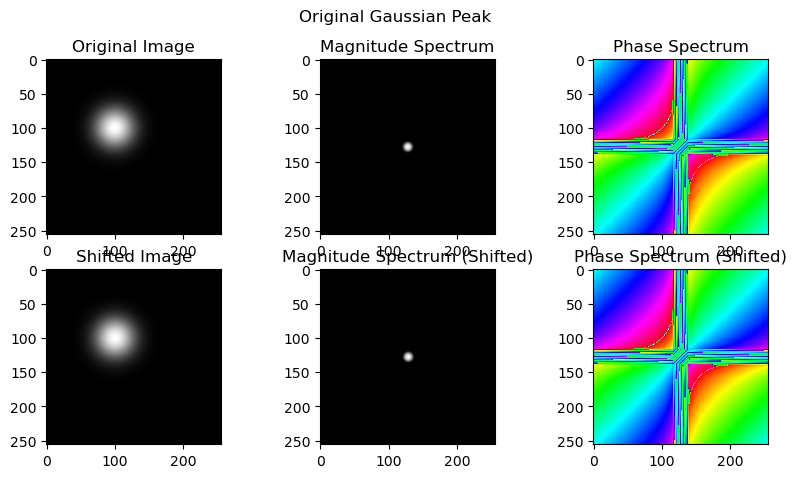

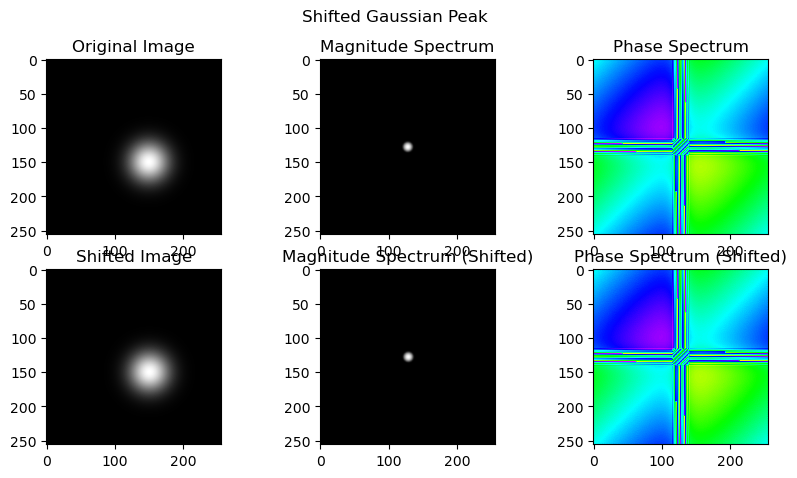

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fftshift, fft2, ifft2

def create_gaussian_peak(shape, center, sigma):
    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]))
    return np.exp(-((x - center[0])**2 + (y - center[1])**2) / (2 * sigma**2))

def plot_fft_spectrum(image, title):
    spectrum = fft2(image)
    spectrum_shifted = fftshift(spectrum)

    magnitude_spectrum = np.abs(spectrum_shifted)
    phase_spectrum = np.angle(spectrum_shifted)

    plt.figure(figsize=(10, 5))

    plt.subplot(231)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(232)
    plt.imshow(np.log(1 + magnitude_spectrum), cmap='gray')
    plt.title('Magnitude Spectrum')

    plt.subplot(233)
    plt.imshow(phase_spectrum, cmap='hsv')
    plt.title('Phase Spectrum')

    shifted_image = ifft2(fftshift(spectrum_shifted))
    plt.subplot(234)
    plt.imshow(np.real(shifted_image), cmap='gray')
    plt.title('Shifted Image')

    plt.subplot(235)
    plt.imshow(np.log(1 + np.abs(fftshift(fft2(shifted_image)))), cmap='gray')
    plt.title('Magnitude Spectrum (Shifted)')

    plt.subplot(236)
    plt.imshow(np.angle(fftshift(fft2(shifted_image))), cmap='hsv')
    plt.title('Phase Spectrum (Shifted)')

    plt.suptitle(title)
    plt.show()

# Parameters
image_shape = (256, 256)
peak_center1 = (100, 100)
peak_center2 = (150, 150)
sigma = 20

# Create Gaussian peak at the original location
original_peak = create_gaussian_peak(image_shape, peak_center1, sigma)
plot_fft_spectrum(original_peak, 'Original Gaussian Peak')

# Create Gaussian peak at a different location
shifted_peak = create_gaussian_peak(image_shape, peak_center2, sigma)
plot_fft_spectrum(shifted_peak, 'Shifted Gaussian Peak')
